## La base est formée de 60 000 données d'apprentissage et de 10 0000 données de test.

## Chaque données représente : une image et le chiffre attendu.

## Chaque images est de taille 28 * 28 pixels.

## En 256 niveau de gris ( chaque pixel).


##                      Bibliotheques necessaires 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
# !pip install pydot
#!pip install graphviz


In [14]:

# ********** Pour télécharger le jeu de données ***************************



(images_entrainement, labels_entrainement), (images_test, labels_test) = keras.datasets.mnist.load_data()




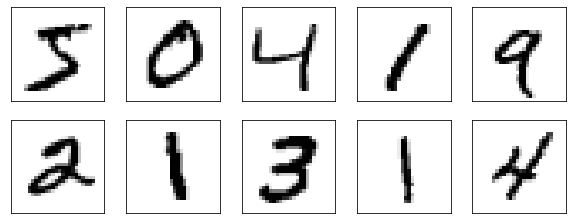

In [22]:

# ****************  Pour afficher les images d'entrainement *********************

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_entrainement[i], cmap=plt.cm.binary)

plt.show()


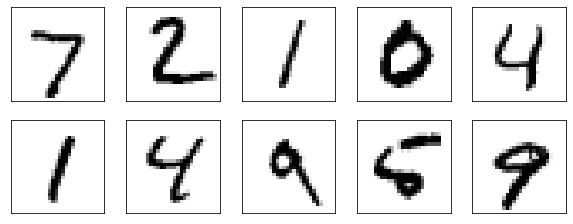

In [23]:
# ****************  Pour afficher les images de test *********************

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test[i], cmap=plt.cm.binary)

plt.show()

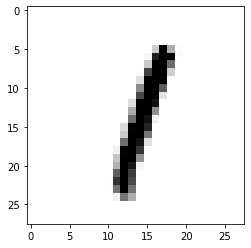

In [26]:

# ******************* Pour afficher une image d'entrainement [particulière] *******************


plt.imshow(images_test[5], cmap='Greys')
plt.show()


In [5]:


# ************** Préparer les données ******************************


num_classes = 10   # sortie correspondant de 0 à 9
input_shape = (28, 28, 1)  # tableau 28 x 28 de 0 à 255 

##                                       Normalisation des données

In [26]:


# **************************************
#    Convertissez les exemples de données d'entiers en nombres à virgule flottante :
#    Mettez ces valeurs à l'échelle dans une plage de 0 à 1 avant de les alimenter au modèle de réseau neuronal. 
#    Pour ce faire, divisez les valeurs par 255.
#    Il est important que l' ensemble d'apprentissage et
#    l' ensemble de test soient prétraités de la même manière :


images_entrainement = images_entrainement.astype("float32") / 255
images_test = images_test.astype("float32") / 255


In [19]:


#  les images sont de la forme (28, 28, 1)

images_entrainement = np.expand_dims(images_entrainement, -1)
images_test = np.expand_dims(images_test, -1)

print("images_entrainement shape:", images_entrainement.shape)
print(images_entrainement.shape[0], "images d'entrainement")
print(images_test.shape[0], "images de test")


images_entrainement shape: (60000, 28, 28, 1)
60000 images d'entrainement
10000 images de test


In [28]:

# ****   Convertir 

labels_entrainement = keras.utils.to_categorical(labels_entrainement, num_classes)
labels_test = keras.utils.to_categorical(labels_test, num_classes)


In [6]:


# ****************** Construire le réseau de neurones *****************************************



model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

2022-08-27 18:22:16.534892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-27 18:22:16.534929: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-27 18:22:16.534954: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Lenovo-G50-80): /proc/driver/nvidia/version does not exist
2022-08-27 18:22:16.535661: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:

# ********************* Visualisation de l'architecture ***********************

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

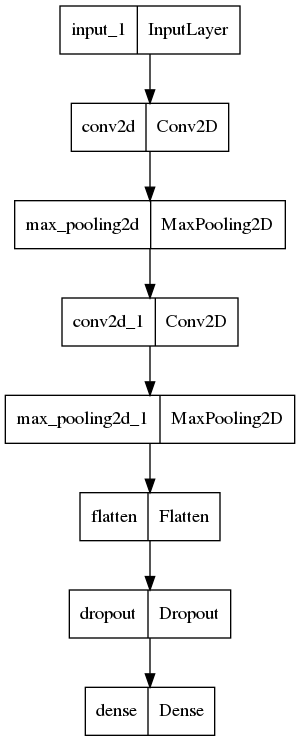

In [8]:

keras.utils.plot_model(model)


##                                   Compilation du modele

In [11]:

# *********************** Compilation du modele *************************


model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


##                                      Formation du modele 

In [33]:
model.fit(images_entrainement, labels_entrainement, batch_size=128, epochs=1, validation_split=0.1)

2022-08-26 21:40:18.736185: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


422/422 [==============================] - 34s 79ms/step - loss: 0.3628 - accuracy: 0.8886 - val_loss: 0.0797 - val_accuracy: 0.9800


In [15]:



from keras.models import load_model

model.save('mon_model.h5')  



model = load_model('mon_model.h5')




##                                       Evaluation du modele

In [16]:

# *****************************  Routine pour l'évaluation du model *********************************

score = model.evaluate(images_test, labels_test, verbose=1)
print("Valeur de l'erreur sur les données de test (loss) :" , score[0])
print("Précision sur les données de test (accuracy) :", score[1])


ValueError: in user code:

    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1501, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/jean/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [38]:


# ************************* Autre routine pour l'évaluation du model ****************************************


loss, acc = model.evaluate(images_test, labels_test)  # returns loss and metrics
print("perte: %.2f" % loss)
print("precision: %.2f" % acc)


313/313 [==============================] - 3s 8ms/step - loss: 0.0879 - accuracy: 0.9736
perte: 0.09
precision: 0.97


##     ****** ********************  Prédiction  *****************************************



model.predict() – Un modèle peut être créé et équipé de données formées, et utilisé pour faire une prédiction : 

313/313 [==============================] - 3s 8ms/step
analyse du modele : [1.5704390e-17 3.2479173e-15 2.1230479e-26 5.5725438e-36 3.4414500e-33
 6.8306112e-12 2.1886761e-13 1.7095412e-01 8.2904589e-01 4.0659845e-26]
Chiffre attendu : 9
Chiffre prédit par le modele : 8


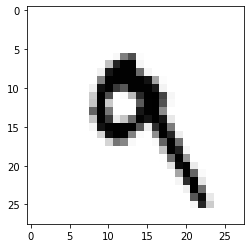

In [24]:
y_predict= model.predict(images_test)

i=7 # représente le numéro d'ordre de l'image pas le numéro de l'image

chiffre_predit = np.argmax(y_predict[i])

print("analyse du modele :", y_predict[i])
print("Chiffre attendu :", labels_test[i])
print("Chiffre prédit par le modele :", chiffre_predit)

plt.imshow(images_test[i], cmap='Greys')
plt.show()